# Library

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# # 패키지 영구설치 경로연결
# import os
# import sys
# my_path = '/content/package'
# package_savepath = '/content/drive/MyDrive/Software/Package'
# os.symlink(package_savepath, my_path)
# sys.path.insert(0, my_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading Module

In [ ]:
!pip install --upgrade numpy seaborn pandas
!pip install ydata_profiling
!pip install missingno
!pip install tqdm
!pip install catboost
!pip install shap

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.16.1 requires numpy<2.2,>=1.16.0, but you have numpy 2.2.4 which is incompatible.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.2.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
  Using 

In [ ]:
# Auto reload of library
%load_ext autoreload
%autoreload 2

# System related and data input controls
import os

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# Visualization
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
## 한글 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
## NanumGothic 폰트 경로 지정
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
## 한글 폰트 설정
matplotlib.rcParams['font.family'] = font_prop.get_name()
plt.rc('font', family='NanumGothic')
sns.set(font=font_prop.get_name())
## 마이너스 표시 설정
plt.rcParams['axes.unicode_minus'] = False

# Understanding of Data
from ydata_profiling import ProfileReport
import missingno as msno

# Custom
## 사용자의 실제 작업경로로 설정!
os.chdir('work_path')
!ls
from module_KK import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
 BA1_TargetMarketing_DataPreprocessing_KK.ipynb   module_KK.py	 기획안.txt   재직자과정_과거자료
 BA1_TargetMarketing_ModelingAI_KK.ipynb	  __pycache__	'나눔 글꼴'
 install_packages_KK.ipynb			  Result	 서류


# Hyperparameter

In [ ]:
# Data Preprocessing
file_location = os.path.join('/content/drive/MyDrive/Research/SavedData/MDIS-SocialSurvey/df_concat.csv')
Y_colname = '기부여부'
TEST_SIZE = 0.2
RANDOM_STATE = 123
SAMPLING_METHOD = 'RandomUnderSampler'
SAMPLING_STRATEGY = 'auto'
SCALER = MinMaxScaler()
LABEL_LIST = ['Non-donation', 'Donation']

# Modeling AI
OUTPUT_TYPE = 'logit'
MAX_DISPLAY = 30
DEPENDENCY = True

# Data Preprocessing

- 불필요 변수 삭제
- 결측치 채우기
- 이상치 처리
- 데이터 변환
- 종속변수/독립변수 & Train/Test 분리
- 스케일링

## Functionalization by ChatGPT

```python
너는 전문적인 Python 기반 Data Scientist다.
- 목표: 전처리가 완료된 함수를 생성해줘
- 함수이름: preprocessing_MDIS_KK
- 함수입력: df
- 함수출력: X_train, X_test, Y_train, Y_test, df_prep
- 출력형태: X는 모두 array, Y는 모두 dataframe, df_prep는 dataframe
- 전처리1: 결측치의 비율이 50% 넘는 변수는 삭제해줘
- 전처리2: 변수의 값의 종류가 1개인 변수는 삭제해줘
- 전처리3: ['가구일련번호', '가구원번호', '가구주관계코드', '가구가중값', '가구원가중값'] 변수들은 삭제해줘
- 전처리4: 결측치를 채워야 하는데 변수의 값의 형태가 문자인 경우엔 Temp_KK라는 값으로 채워주고, 숫자인 경우엔 값들의 "최대값+1"의 값으로 채워줘
- 전처리5: 종속변수의 이름은 "기부여부"야. 나머지는 모두 독립변수로 반영해줘
- 전처리6: train_test_split 함수를 사용하고 test_size=0.2, random_state=123을 사용해서 데이터를 분리해줘
- 전처리7: MinMaxScaler를 사용해서 X_train, X_test를 변환해줘
```

# Data Process Summary

In [ ]:
# 데이터분석 프로세스
## 데이터 로딩
df = pd.read_csv(file_location, encoding='utf-8-sig')
## 데이터 전처리
X_train, X_test, Y_train, Y_test, df_prep = preprocessing_MDIS_KK(df)
## 결과 확인
print(X_train.shape, Y_train.shape, X_train.min(), X_train.max())
print(X_test.shape, Y_test.shape, X_test.min(), X_test.max())
print('Complete!')

(147932, 99) (147932, 1) 0.0 1.0000000000000004
(36983, 99) (36983, 1) 0.0 1.0000000000000004
Complete!


# Modeling AI

In [ ]:
# Logistic Regression
model = LogisticRegression(fit_intercept=True, class_weight='balanced')
model.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced')

## Feature Explanation

### Classical Total

In [ ]:
# Classic
X_colname = [col for col in df_prep.columns if col != Y_colname]
coef = pd.DataFrame({'Features': X_colname,
                      'Coef': model.coef_[0],
                      'Odds': np.exp(model.coef_[0])})
coef_posneg = pd.concat([coef[coef.Odds >= 1].sort_values(by='Odds', ascending=False).reset_index().iloc[:,1:],
                          coef[coef.Odds < 1].sort_values(by='Odds', ascending=True).reset_index().iloc[:,1:]], axis=1)
display(coef_posneg)

,Features,Coef,Odds,Features,Coef,Odds
0,단체참여_기타여부,2.584481,13.256405,향후기부의사여부,-2.350460,0.095325
1,교육정도코드,0.841319,2.319425,단체참여_종교단체여부,-1.912880,0.147655
2,사회적관계망_대화상대도움요청대상인원수,0.796587,2.217958,Year,-1.772732,0.169868
3,만연령,0.637902,1.892506,자원봉사활동여부,-0.866165,0.420562
4,분류코드_연령1코드,0.424487,1.528806,사회적관계망_대화상대도움요청대상유무,-0.809389,0.445130
5,생활여건변화_전반적생활여건코드,0.403112,1.496475,단체참여_시민사회단체여부,-0.509482,0.600807
6,분류코드_가구소득1코드,0.400535,1.492623,단체참여_이익단체여부,-0.487773,0.613992
7,노후사회적관심사코드,0.370150,1.447952,노후준비방법_본인노후준비여부,-0.466489,0.627200
8,분류코드_연령13코드,0.363652,1.438573,주관적소득수준코드,-0.460078,0.631234
9,내년가구재정상태코드,0.359634,1.432805,독서여부,-0.437851,0.645422


### XAI Individual

In [ ]:
# SHAP
explainer = shap.Explainer(model, X_train,
                           model_type='linear', feature_names=X_colname)
shap_values_train = explainer(X_train)
shap_values_test = explainer(X_test)

# Individual Explanation
shap_sample = shap_values_train.sample(1)
shap.decision_plot(base_value=shap_sample.base_values,
                   shap_values=shap_sample.values,
                   features=shap_sample.data,
                   feature_names=X_colname,
                   feature_display_range=slice(None, -MAX_DISPLAY, -1),
                   link='logit', highlight=0)
shap.initjs()
display(shap.force_plot(base_value=shap_sample.base_values,
                        shap_values=shap_sample.values,
                        features=shap_sample.data,
                        feature_names=X_colname,
                        link='logit'))
shap.initjs()
shap_sample = shap_values_train.sample(1000)
display(shap.force_plot(base_value=shap_sample.base_values,
                        shap_values=shap_sample.values,
                        features=shap_sample.data,
                        feature_names=X_colname,
                        link='logit'))


Output hidden; open in https://colab.research.google.com to view.

### XAI Total

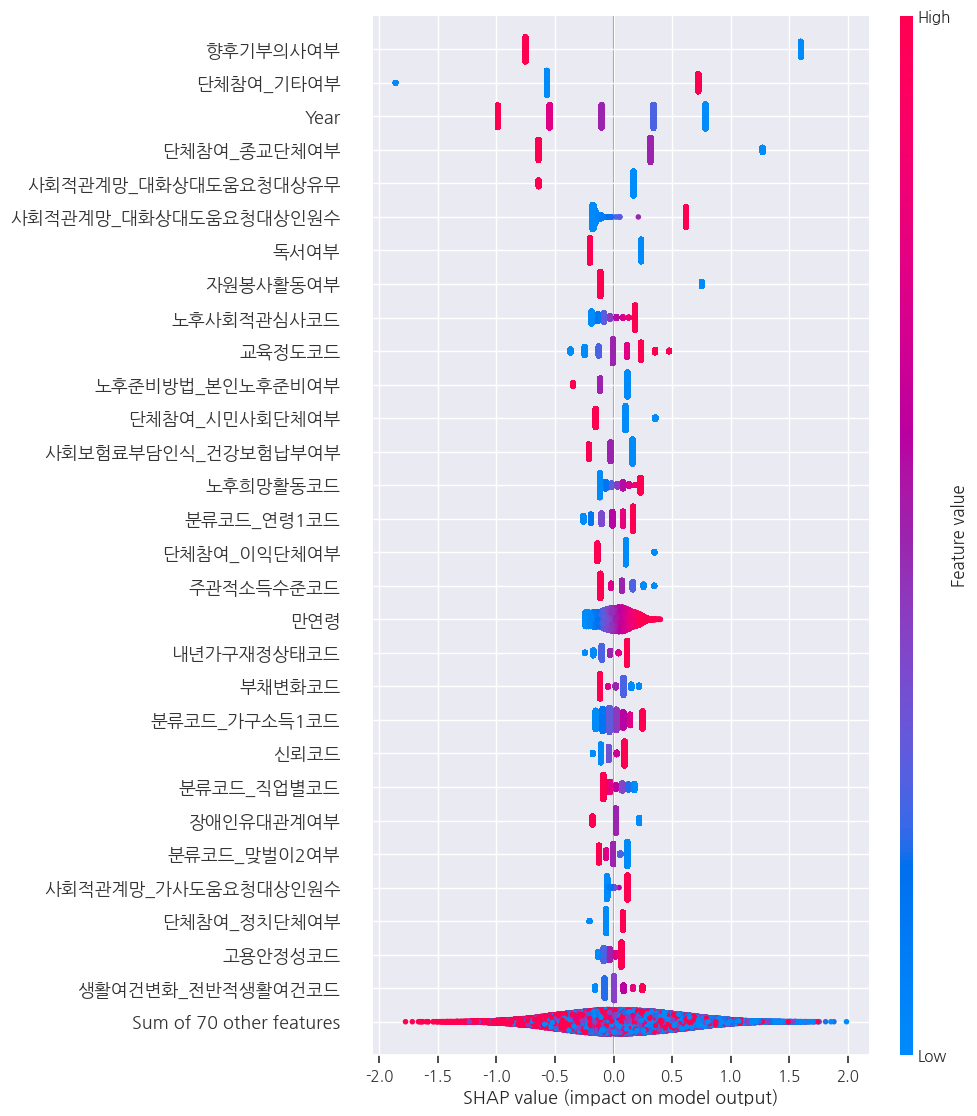

In [ ]:
# Total Explanation
shap.plots.beeswarm(shap_values=shap_values_train, max_display=MAX_DISPLAY)

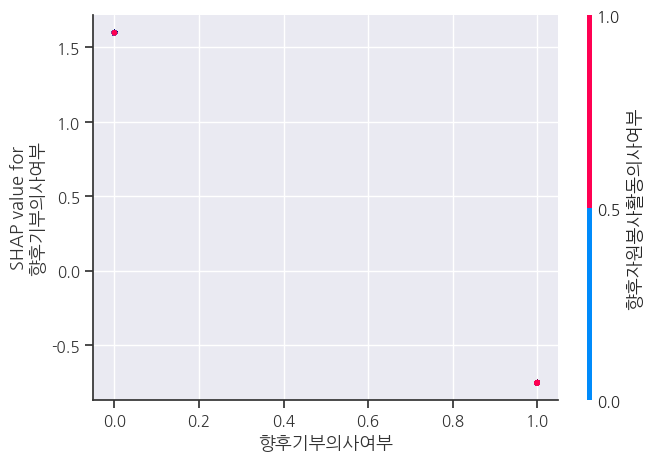

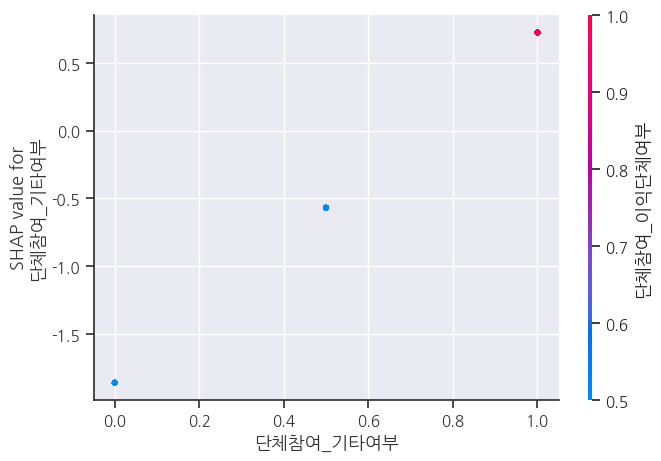

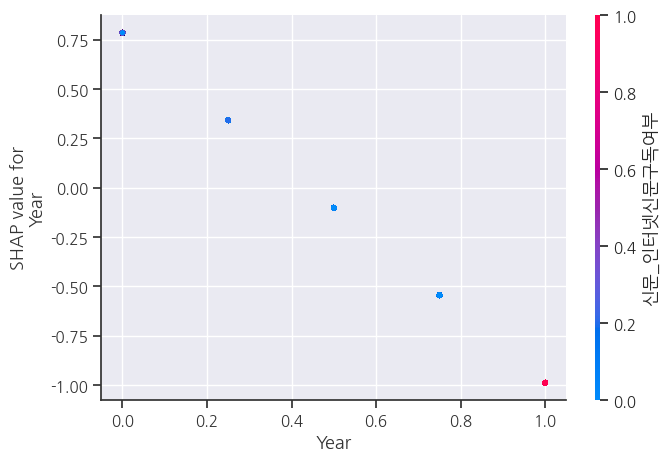

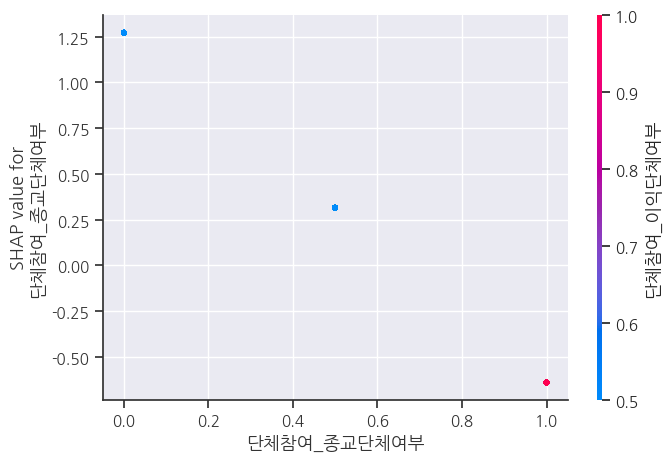

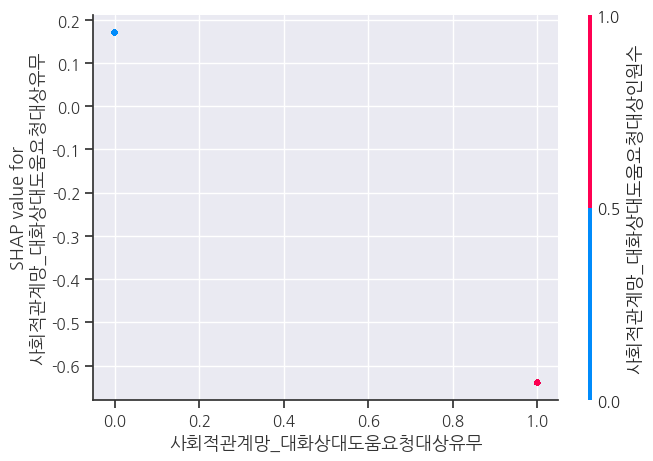

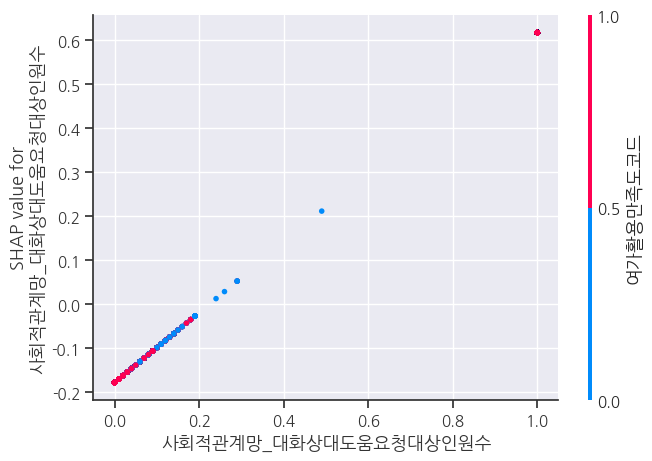

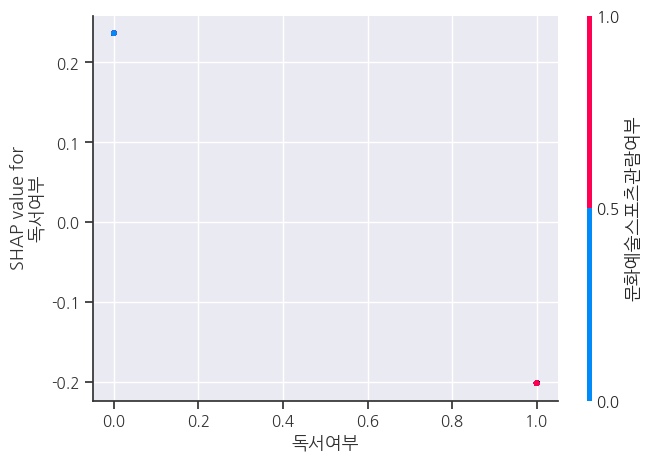

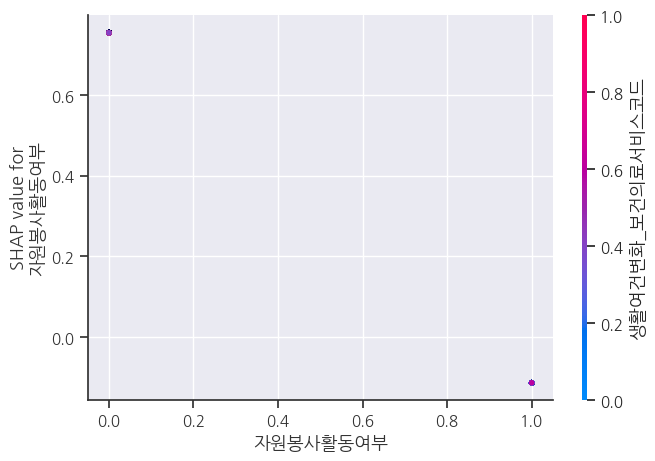

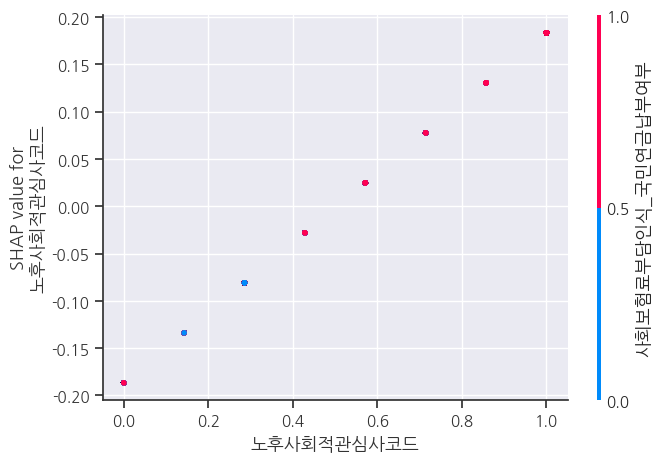

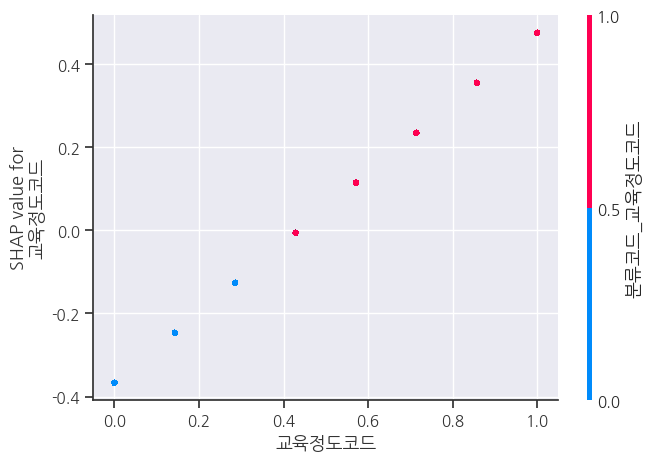

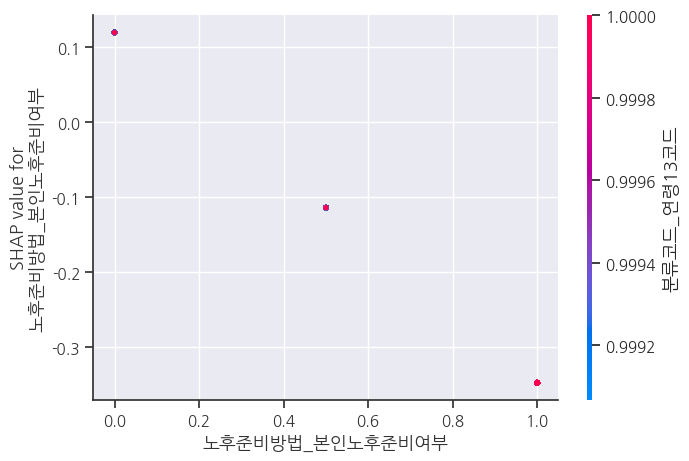

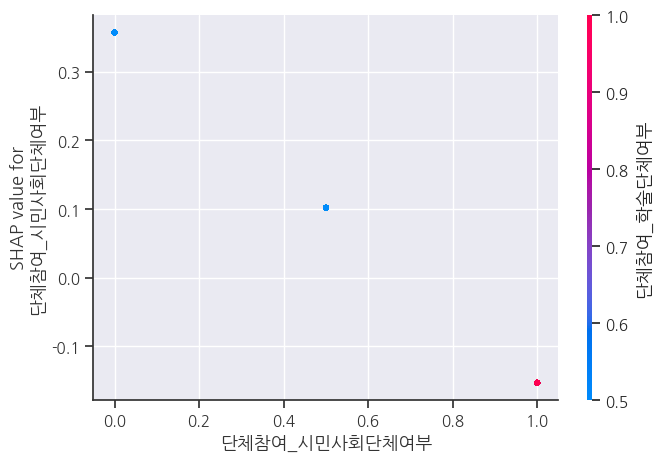

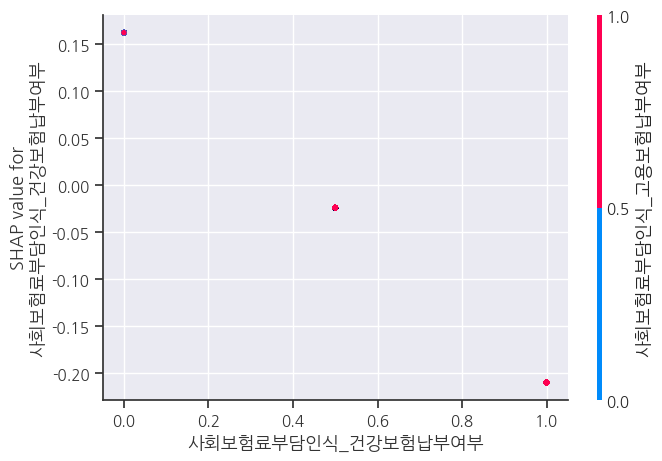

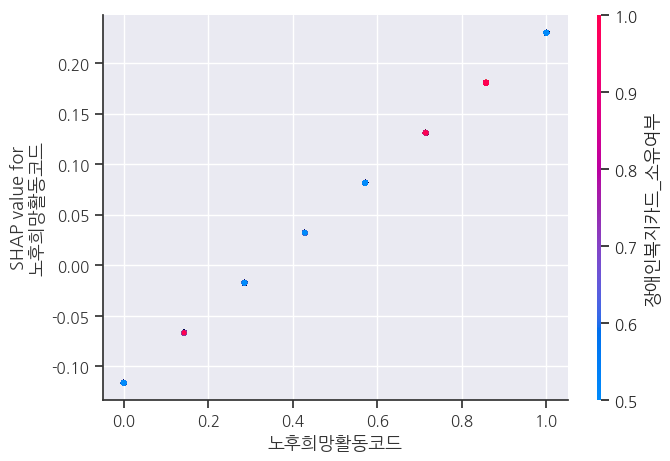

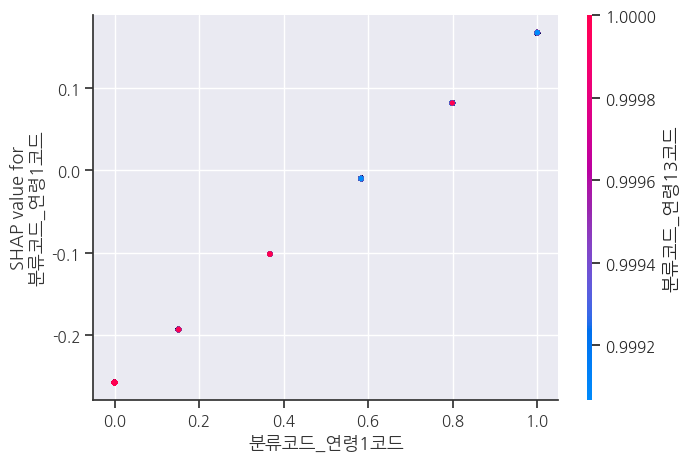

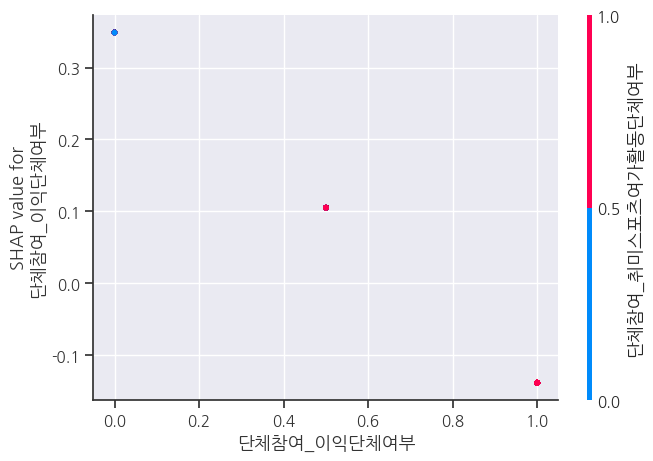

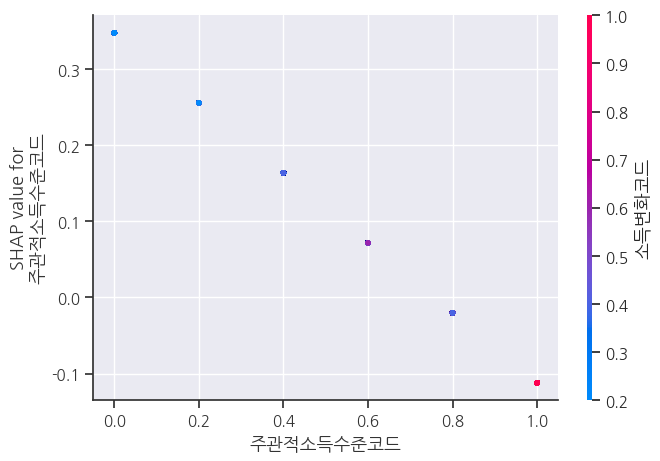

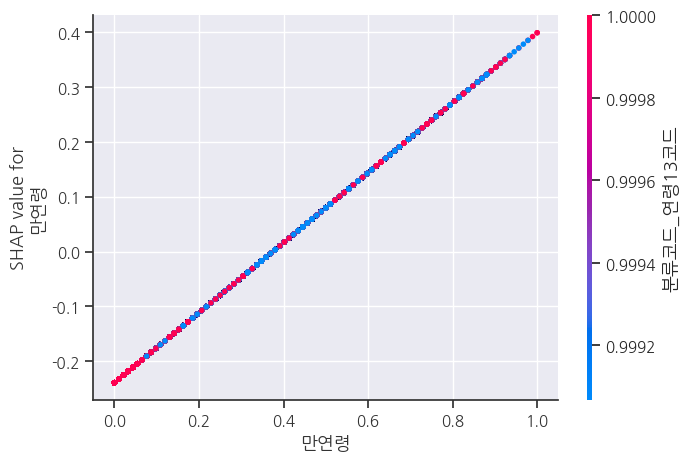

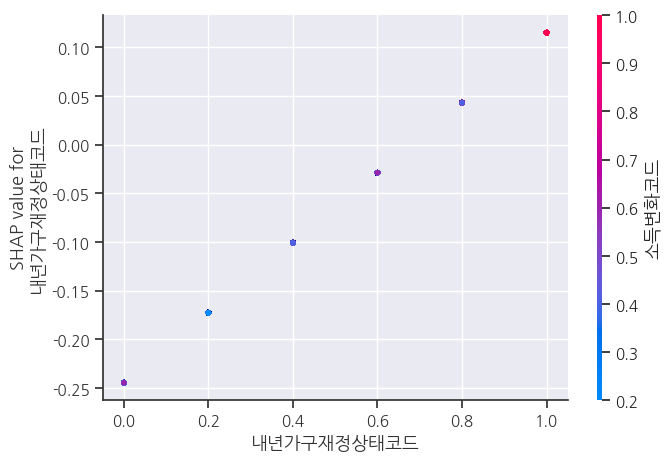

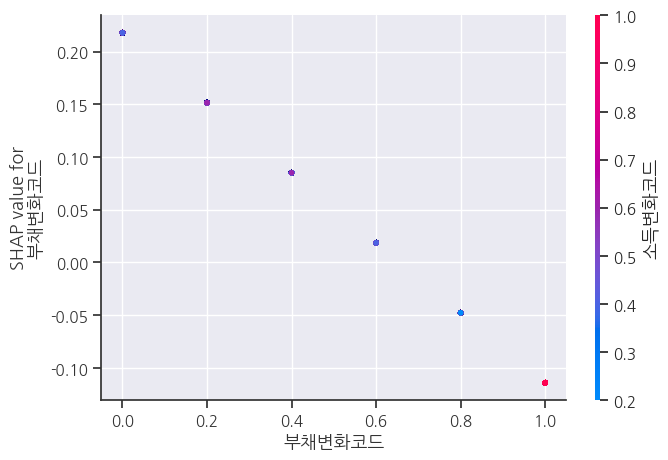

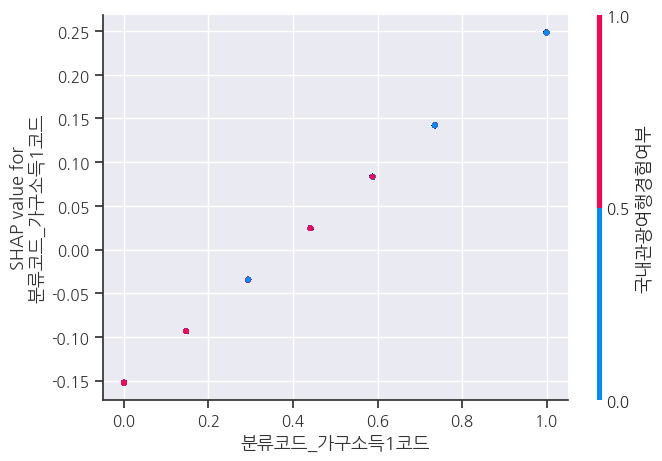

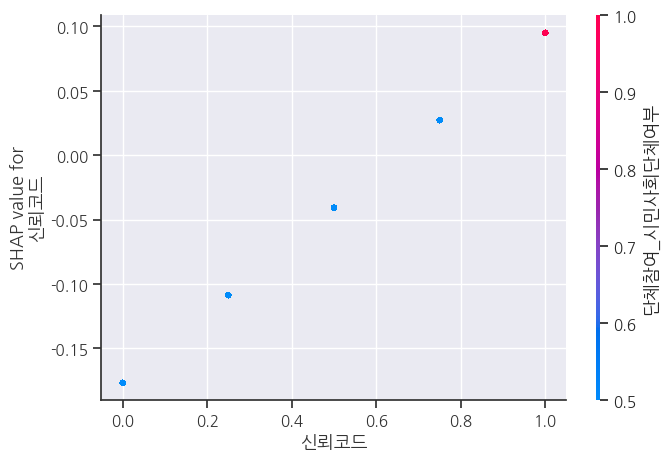

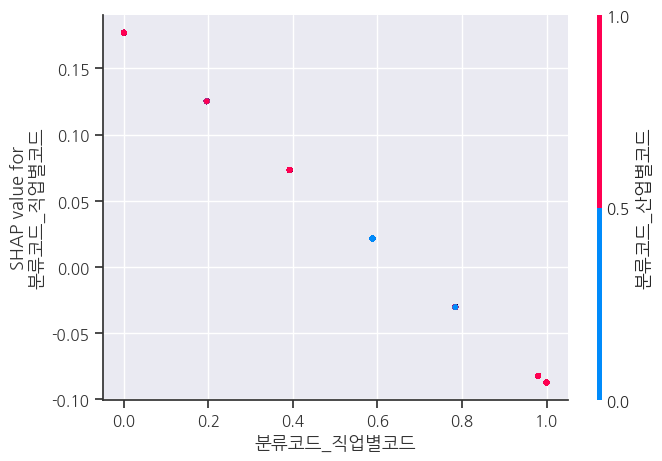

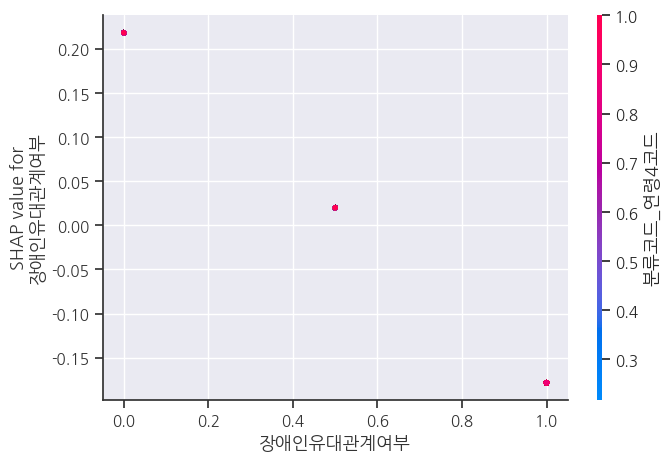

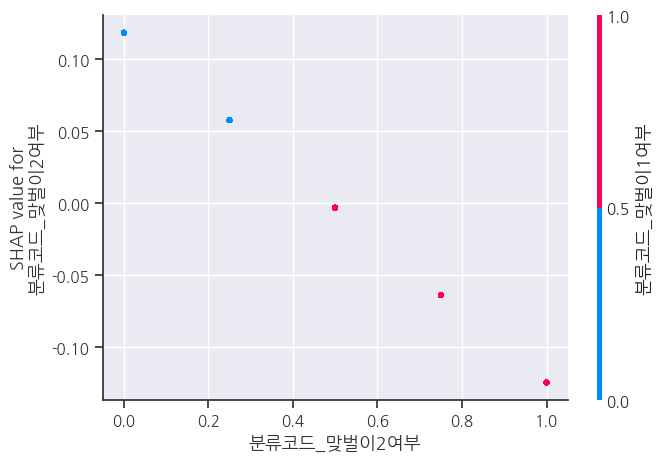

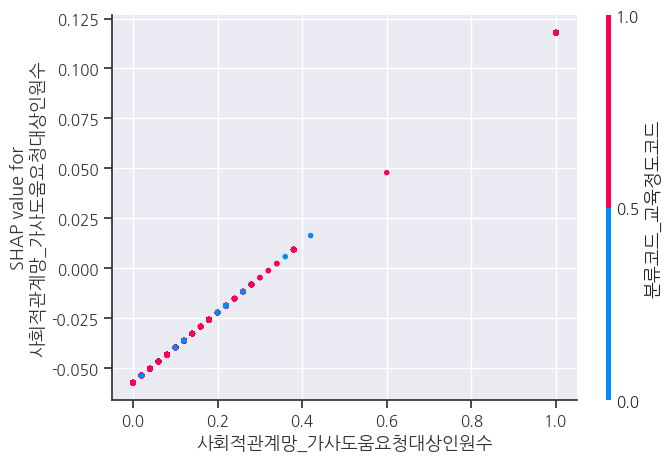

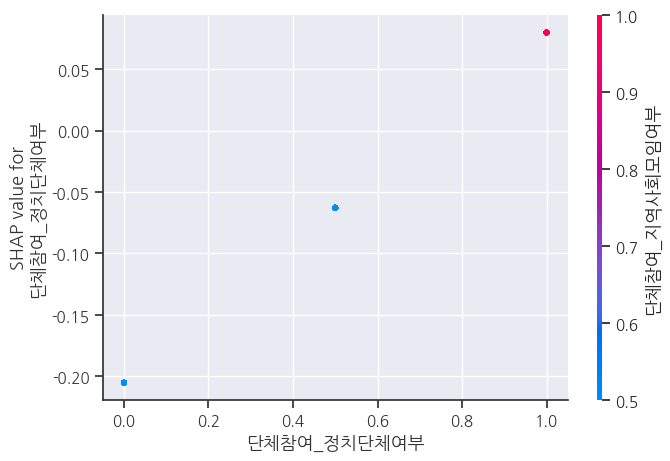

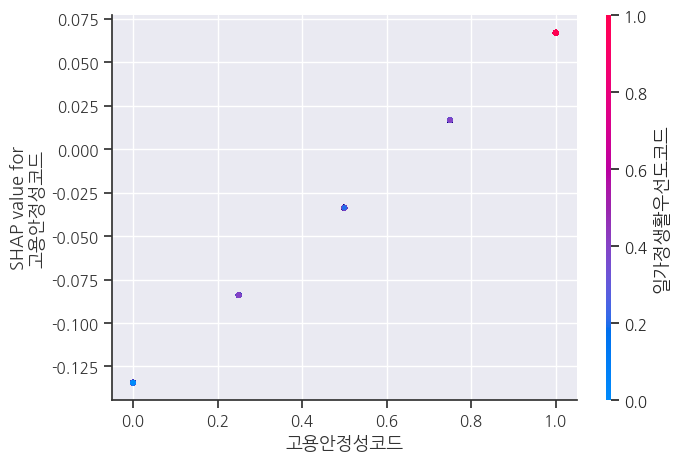

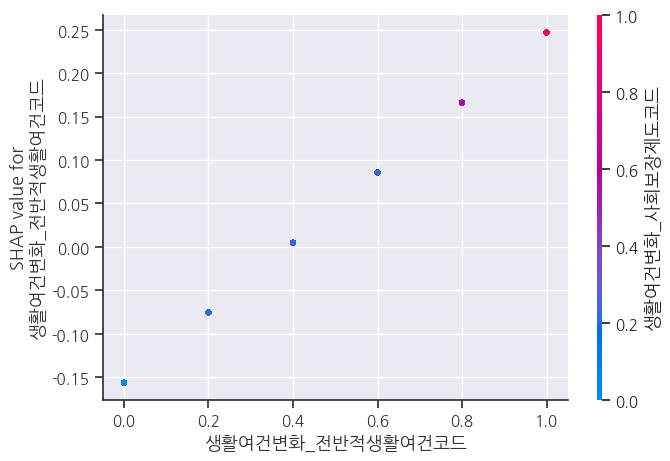

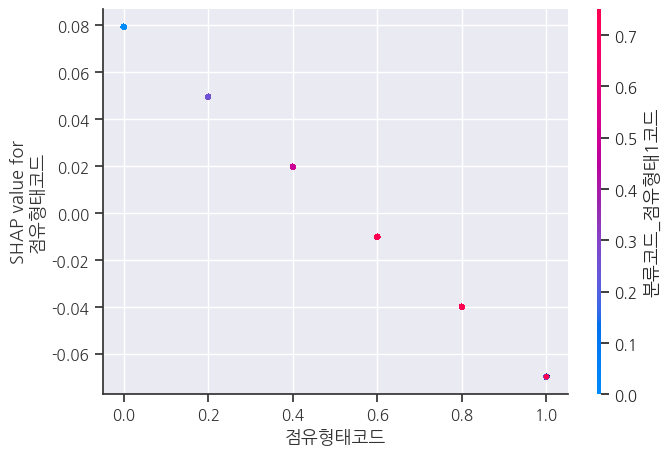

In [ ]:
# Total Explanation by Interaction
shap_importance = np.abs(shap_values_train.values).mean(axis=0)
feature_order = np.argsort(shap_importance)[::-1]
feature_order = [X_colname[i] for i in feature_order]

for col in feature_order[:MAX_DISPLAY]:
  shap.dependence_plot(ind=col, shap_values=shap_values_train.values,
                       features=X_train, feature_names=X_colname)

### Functionalization by ChatGPT

```python
너는 전문적인 Python 기반 Data Scientist다.
- 목표: 모델을 설명하는 함수를 생성해줘
- 함수이름: explanation_SHAP_KK
- 함수입력: 아래 기능들을 실행하기 위해 필요한 파라미터를 사용하되, 일반화된 사용을 위해 최대한 입력 파라미터를 다양하게 반영해줘
- 포함기능1:
# SHAP
explainer = shap.Explainer(model, X_train,
                           model_type='linear', feature_names=X_colname)
shap_values_train = explainer(X_train)
shap_values_test = explainer(X_test)

# Individual Explanation
shap_sample = shap_values_train.sample(1)
shap.decision_plot(base_value=shap_sample.base_values,
                   shap_values=shap_sample.values,
                   features=shap_sample.data,
                   feature_names=X_colname,
                   feature_display_range=slice(None, -MAX_DISPLAY, -1),
                   link='logit', highlight=0)
shap.initjs()
display(shap.force_plot(base_value=shap_sample.base_values,
                        shap_values=shap_sample.values,
                        features=shap_sample.data,
                        feature_names=X_colname,
                        link='logit'))
shap.initjs()
shap_sample = shap_values_train.sample(1000)
display(shap.force_plot(base_value=shap_sample.base_values,
                        shap_values=shap_sample.values,
                        features=shap_sample.data,
                        feature_names=X_colname,
                        link='logit'))

- 포함기능2:
# Total Explanation
shap.plots.beeswarm(shap_values=shap_values_train, max_display=MAX_DISPLAY)

- 포함기능3:
# Total Explanation by Interaction
shap_importance = np.abs(shap_values_train.values).mean(axis=0)
feature_order = np.argsort(shap_importance)[::-1]
feature_order = [X_colname[i] for i in feature_order]

for col in feature_order[:MAX_DISPLAY]:
  shap.dependence_plot(ind=col, shap_values=shap_values_train.values,
                       features=X_train, feature_names=X_colname)

- 포함기능4: 위의 3가지 포함기능은 모두 shap_values_train에 대한 결과만 제공한다. 따라서 shap_values_test의 결과도 출력하되 결과가 train에 대한 것인지 test에 대한 것인지 함께 표시해줘
```

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

def explanation_SHAP_KK(model, X_train, X_test, X_colname,
                        MAX_DISPLAY=10, model_type='linear',
                        link='logit', sample_size=1,
                        sample_size_1000=1000,
                        plot_interaction=True,
                        feature_display_range=None):
    """
    SHAP 설명을 제공하는 함수.

    Parameters:
    - model: 학습된 모델 (예: XGBClassifier, LogisticRegression)
    - X_train: 훈련 데이터 (특징 행렬)
    - X_test: 테스트 데이터
    - X_colname: 특성 이름 리스트 (예: ['feature1', 'feature2', ...])
    - MAX_DISPLAY: SHAP 설명에서 표시할 최대 특성 수 (기본값 10)
    - model_type: 모델 유형 ('linear', 'tree', 'svm', 'auto' 등, 기본값 'linear')
    - link: 로짓 링크 함수 (기본값 'logit')
    - sample_size: 개별 설명을 위한 샘플 크기 (기본값 1)
    - sample_size_1000: 1000개의 샘플에 대해 설명할 때 샘플 크기 (기본값 1000)
    - plot_interaction: 상호작용 설명을 플로팅할지 여부 (기본값 True)
    - feature_display_range: 특성 표시 범위 (기본값 None)
    """

    # SHAP 설명자 생성
    explainer = shap.Explainer(model, X_train, model_type=model_type, feature_names=X_colname)
    shap_values_train = explainer(X_train)
    shap_values_test = explainer(X_test)

    # 개별 설명 (샘플 1) for Train
    shap_sample_train = shap_values_train.sample(sample_size)
    print("Train Sample Explanation:")
    shap.decision_plot(base_value=shap_sample_train.base_values,
                       shap_values=shap_sample_train.values,
                       features=shap_sample_train.data,
                       feature_names=X_colname,
                       feature_display_range=feature_display_range or slice(None, -MAX_DISPLAY, -1),
                       link=link, highlight=0)
    shap.initjs()
    display(shap.force_plot(base_value=shap_sample_train.base_values,
                            shap_values=shap_sample_train.values,
                            features=shap_sample_train.data,
                            feature_names=X_colname,
                            link=link))

    # 개별 설명 (샘플 1) for Test
    shap_sample_test = shap_values_test.sample(sample_size)
    print("Test Sample Explanation:")
    shap.decision_plot(base_value=shap_sample_test.base_values,
                       shap_values=shap_sample_test.values,
                       features=shap_sample_test.data,
                       feature_names=X_colname,
                       feature_display_range=feature_display_range or slice(None, -MAX_DISPLAY, -1),
                       link=link, highlight=0)
    shap.initjs()
    display(shap.force_plot(base_value=shap_sample_test.base_values,
                            shap_values=shap_sample_test.values,
                            features=shap_sample_test.data,
                            feature_names=X_colname,
                            link=link))

    # 개별 설명 (샘플 1000) for Train
    shap_sample_train = shap_values_train.sample(sample_size_1000)
    print("Train Sample 1000 Explanation:")
    display(shap.force_plot(base_value=shap_sample_train.base_values,
                            shap_values=shap_sample_train.values,
                            features=shap_sample_train.data,
                            feature_names=X_colname,
                            link=link))

    # 개별 설명 (샘플 1000) for Test
    shap_sample_test = shap_values_test.sample(sample_size_1000)
    print("Test Sample 1000 Explanation:")
    display(shap.force_plot(base_value=shap_sample_test.base_values,
                            shap_values=shap_sample_test.values,
                            features=shap_sample_test.data,
                            feature_names=X_colname,
                            link=link))

    # 전체 설명 (beeswarm 플롯) for Train
    print("Train Total Explanation (Beeswarm):")
    shap.plots.beeswarm(shap_values=shap_values_train, max_display=MAX_DISPLAY)

    # 전체 설명 (beeswarm 플롯) for Test
    print("Test Total Explanation (Beeswarm):")
    shap.plots.beeswarm(shap_values=shap_values_test, max_display=MAX_DISPLAY)

    # 상호작용 설명 (dependence plot) for Train
    if plot_interaction:
        print("Train Total Explanation by Interaction:")
        shap_importance_train = np.abs(shap_values_train.values).mean(axis=0)
        feature_order_train = np.argsort(shap_importance_train)[::-1]
        feature_order_train = [X_colname[i] for i in feature_order_train]

        for col in feature_order_train[:MAX_DISPLAY]:
            shap.dependence_plot(ind=col, shap_values=shap_values_train.values,
                                 features=X_train, feature_names=X_colname)

        # 상호작용 설명 (dependence plot) for Test
        print("Test Total Explanation by Interaction:")
        shap_importance_test = np.abs(shap_values_test.values).mean(axis=0)
        feature_order_test = np.argsort(shap_importance_test)[::-1]
        feature_order_test = [X_colname[i] for i in feature_order_test]

        for col in feature_order_test[:MAX_DISPLAY]:
            shap.dependence_plot(ind=col, shap_values=shap_values_test.values,
                                 features=X_test, feature_names=X_colname)


In [ ]:
# Explanation
explanation_SHAP_KK(model, X_train, X_test, X_colname,
                    MAX_DISPLAY=MAX_DISPLAY, model_type='linear',
                    link=OUTPUT_TYPE, sample_size=1,
                    sample_size_1000=1000,
                    plot_interaction=True)

In [ ]:
# 데이터분석 프로세스
## 데이터 로딩
df = pd.read_csv(file_location, encoding='utf-8-sig')
## 데이터 전처리
X_train, X_test, Y_train, Y_test, df_prep = preprocessing_MDIS_KK(df)
## 결과 확인
print(X_train.shape, Y_train.shape, X_train.min(), X_train.max())
print(X_test.shape, Y_test.shape, X_test.min(), X_test.max())
print('Complete!')

# Logistic Regression
model = LogisticRegression(fit_intercept=True, class_weight='balanced')
model.fit(X_train, Y_train)

# Explanation
explanation_SHAP_KK(model, X_train, X_test, X_colname,
                    MAX_DISPLAY=MAX_DISPLAY, model_type='linear',
                    link=OUTPUT_TYPE, sample_size=1,
                    sample_size_1000=1000,
                    plot_interaction=True)

## Prediction Explanation

In [ ]:
# Prediction
P_trpred = pd.DataFrame(model.predict_proba(X_train)[:,-1],
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict_proba(X_test)[:,-1],
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

In [ ]:
# Evaluation
metrics.confusion_matrix(Y_test, Y_tepred)

array([[21815,  5936],
       [ 1575,  7657]])

In [ ]:
# Metrics
precision = metrics.precision_score(Y_test, Y_tepred)
recall = metrics.recall_score(Y_test, Y_tepred, pos_label=1)
f1_score = metrics.f1_score(Y_test, Y_tepred)
accuracy = metrics.accuracy_score(Y_test, Y_tepred)
balanced_accuracy = metrics.balanced_accuracy_score(Y_test, Y_tepred)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_tepred)
auc = metrics.auc(fpr, tpr)
[precision, recall, f1_score, accuracy, balanced_accuracy, auc]

[0.563304642095196,
 0.829397746967071,
 0.6709309967141293,
 0.7969066868561231,
 0.8077477726223052,
 0.8077477726223053]

### Functionalization by ChatGPT

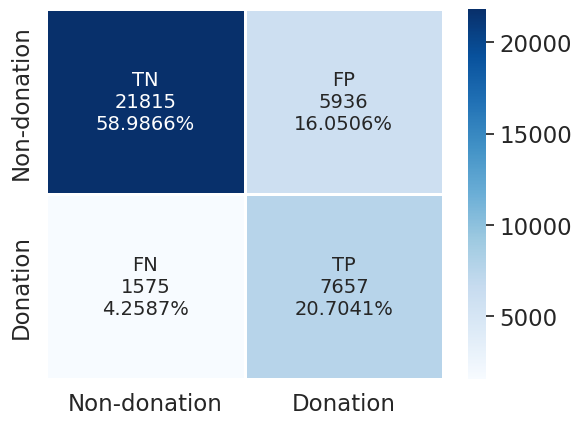

,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Test,36983,7657,21815,5936,1575,0.563305,0.829398,0.786098,0.670931,0.796907,0.807748,0.807748


In [ ]:
evaluation_class_ConfusionMatrix(Y_test, Y_tepred, label_list=LABEL_LIST)
evaluation_class_Metrics(Y_test, Y_tepred)

Performance: 


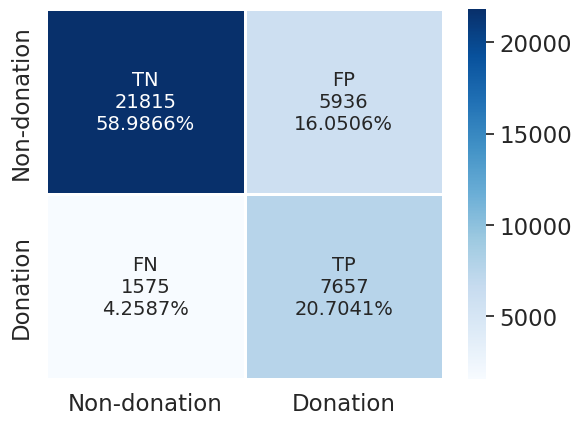

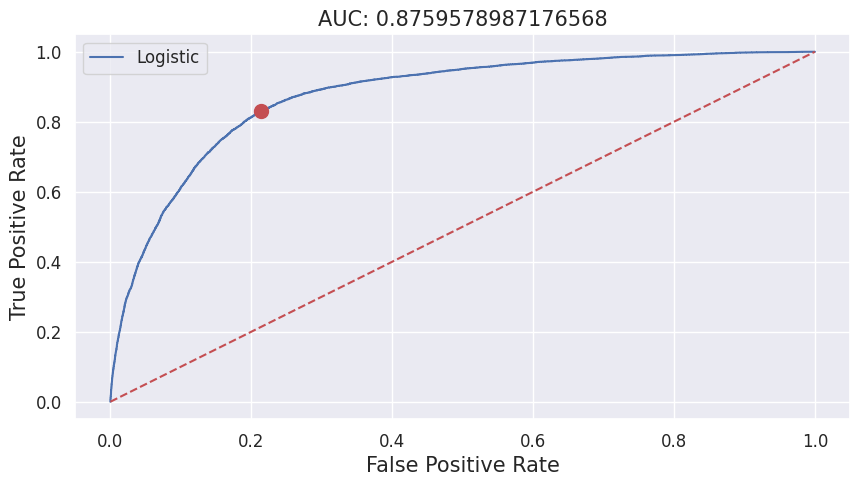

,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Test set,36983,7657,21815,5936,1575,0.563305,0.829398,0.786098,0.670931,0.796907,0.807748,0.875958


,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Entire population,184915,38379,109497,29392,7647,0.566304,0.833855,0.788378,0.674517,0.799697,0.811116,0.879494


In [ ]:
Score_te, Score_trte = prediction_class(model, X_train, Y_train, X_test, Y_test,
                                        LABEL_LIST=LABEL_LIST, ALGO_NAME='Logistic')
display(Score_te, Score_trte)

# BA Process Summary

In [ ]:
# 데이터분석 프로세스
## 데이터 로딩
df = pd.read_csv(file_location, encoding='utf-8-sig')
## 데이터 전처리
X_train, X_test, Y_train, Y_test, df_prep = preprocessing_MDIS_KK(df)
## 결과 확인
print(X_train.shape, Y_train.shape, X_train.min(), X_train.max())
print(X_test.shape, Y_test.shape, X_test.min(), X_test.max())
print('Complete!')

# Logistic Regression
model = LogisticRegression(fit_intercept=True, class_weight='balanced')
model.fit(X_train, Y_train)

# Explanation
explanation_SHAP_KK(model, X_train, X_test, X_colname,
                    MAX_DISPLAY=MAX_DISPLAY, model_type='linear',
                    link=OUTPUT_TYPE, sample_size=1,
                    sample_size_1000=1000,
                    plot_interaction=True)

# Prediction
P_trpred = pd.DataFrame(model.predict_proba(X_train)[:,-1],
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict_proba(X_test)[:,-1],
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

# Evaluation
Score_te, Score_trte = prediction_class(model, X_train, Y_train, X_test, Y_test,
                                        LABEL_LIST=LABEL_LIST, ALGO_NAME='Logistic')
display(Score_te, Score_trte)